# Partial Derivaties

### Introduction

In the previous lesson, we spoke about our technique for gradient descent.  We want to find the parameters that minimize our three dimensional cost curve.  And to do so we take steps towards the minimum.  We need to do so without plotting out the entire cost curve -- when our functions become more complicated, doing so will be too costly.  So then how maximize our descent with each step if we cannot see what's in front of us, how can we assure that we're moving in the correct direction?

We do so by seeing the slope along each dimension - first along the x-axis and then along the y axis.  We move in proportion to the steepness of the slope in each direction.

In this lesson, we talk about how to find the slope in each dimension.  Or in other words how to find the derivative with respect to each variable.  Doing so is called finding the partial derivative.

### Finding the partial derivative

Let's say that we have the following function:

$f(x,y) = 3xy^2$

We would like to calculate how much our output changes as $x$ changes, and also calculate how much the output changes as $y$ changes.

> The notation for the partial derivative of $y$ is: 
> $$\frac{\delta f}{\delta y}$$
> That is, the change in our output of the function $f$ as we change our input $y$

The procedure for calculating this is really similar to our normal procedure for calculating our derivative.  

So remember that if we have a function: 

* $f(x) = 3x^2$ then $f'(x) = 6x$.

Now with partial derivatives, given our function:

$f(x,y) = 3xy^2$

$\frac{\delta f}{\delta y} = 6xy$

Do you see what how we got there? We get there by still applying the same procedure, we just treat variable that is not being differentiated as a constant.

* $f(x,y) = (3x)*y^2$
* $\frac{\delta f}{\delta y} = 2*3x*y^1 = 6xy$


Let's do one more example, and then we'll explain some of the logic and significance of this.

$f(x,y) = 3xy^2$ find $\frac{\delta f}{\delta x}$

$\frac{\delta f}{\delta x} = 3y^2$.  Do you see why?

Here we just treat $3y^2$ as our constant, and then $3y^2$ multiply by $x^0$ (which equals 1) giving us $3y^2$.

### What this means

When we say that we have the partial derivative,  $\frac{\delta f}{\delta y} = 6xy$, what we mean is that we can calculate the rate of change in the $y$ direction, by simply calculating $6xy$ at that point.  So the rate of change in the $y$ direction at point $x = 2, y = 1$ is 12.  And at $x = 3, y = 1$ is 18.

Ok, so this is how we interpret our partial derivative.

### Explaining the partial derivative

So now that we found the two partial derivatives of of the function $f(x,y) = 3xy^2$, let's explain why our procedure for doing so worked.

Remember that we did so by treating each variable that we did not differentiate against as a constant, so the partial derivative $\frac{\delta f}{\delta y} = 6xy$  

To understand why, let's first take a look at our function, $f(x,y) = 3xy^2$.  Here it is:

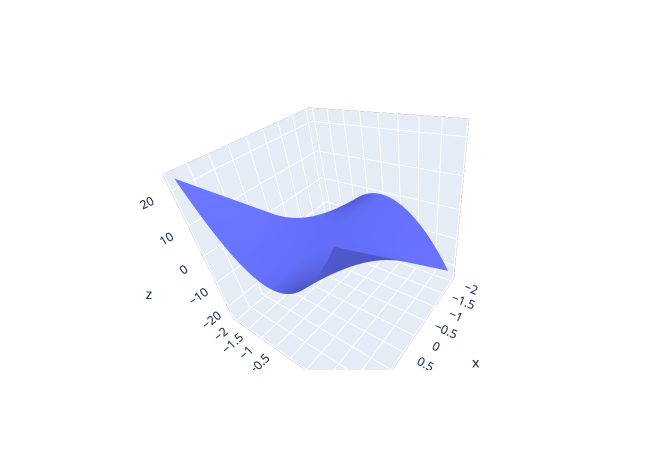

In [33]:
import plotly.graph_objects as go
from partial import x_vals, y_vals

z_vals = z_vals =[f(w_1, w_2) 
         for (w_1, w_2) in list(zip(x_vals, y_vals))]
fig = go.Figure(data=[
    go.Mesh3d(
        x=x_vals,
        y=y_vals,
        z=z_vals,
        colorbar_title='z',
        name='y',
        showscale=True
    )
])
fig

Look at the graph above, and imagine walking through solely in the $x$ direction.  So we start where $x = 0$ and walk upwards until $x = 2$.  If we walk through this curve in the $x$ direction this is essentially what we see.

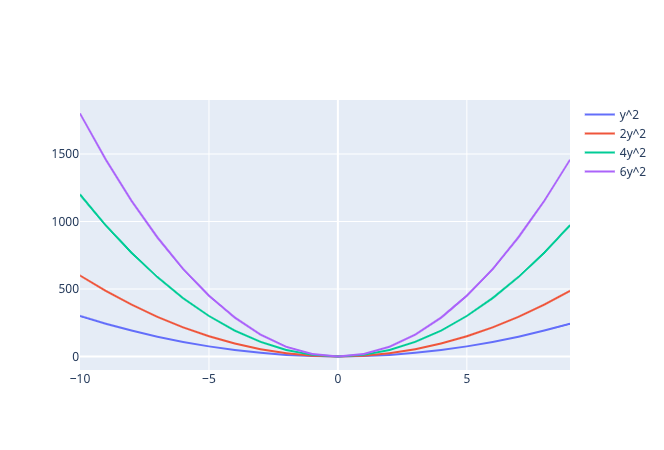

In [34]:
y_vals = list(range(-10, 10))
scatters = [go.Scatter(x=vals, y=[f(num,val) for val in y_vals], name = str(num) + 'y^2') for num in range(2, 7, 2)]

scatter_at_one = go.Scatter(x=vals, y=[f(1,val) for val in y_vals], name = 'y^2')
go.Figure(data=[scatter_at_one, *scatters])

So we see a series of increasingly steeper parabolas.  And if we stop where $x = 1$ then we are standing on a parabola, $f(1, y) = 3*1y^2 = 3y^2$, and at $f(2, y) = 3*2y^2 = 6y^2$.  So then thinking about the rate of change in the $y$ direction when $x = 1$, we have $f(1, y) = 3y^2$ and thus the slope at that point is $3*2*y$.

So when we think of taking the partial derivative of $y$, we can think of sliding to the proper $(x,y)$ point and then leaning just in that $y$ direction.

Believe it or not, we have already done all of the work necessary to calculate the gradient of the function $f(x,y) = 3xy^2$.  Remember that our technique for gradient descent is to, while standing on a given point, find the direction of the next step that descends the most.  And we do this by finding the slope in each direction.  So to figure out how to descend along the function $f(x,y) = 3xy^2$, we look at our two partial derivatives:

$$\frac{\delta f}{\delta y} = 6xy$$
$$\frac{\delta f}{\delta x} = 3y^2$$

So if we are standing on our curve below at the point, $x = 1$, $y = 1$, then we change our values of x and y in the following proportions:

$$\frac{\delta f}{\delta y}(1, 1) = 6*1*1  = 6$$

$$\frac{\delta f}{\delta x}(1, 1) = 3*1^2 = 3$$

So for every six we move in the $y$ direction, we should move $3$ in the $x$ direction when standing at the point $(1, 1)$.  There is just one twist.  What we have found is the direction of *greatest increase*.  For the direction of greatest decrease, we simply move in the opposite direction - so we move -6 in the $y$ direction, and -3 in the $x$ direction.

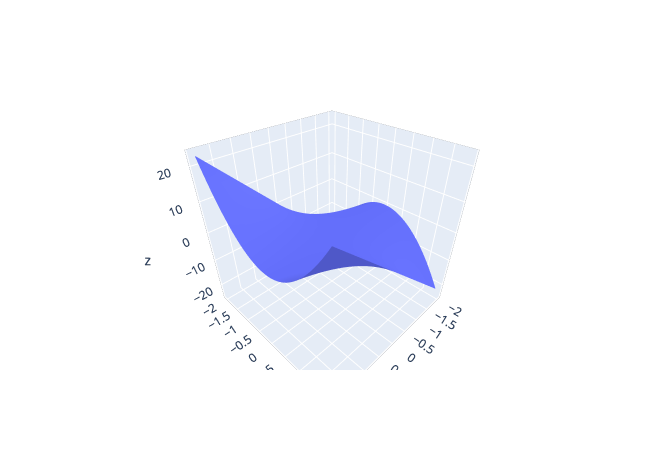

In [35]:
fig

These coordinates that we found can be represented as a vector.  A vector of descent in each direction.  And we represent this vector with the greek letter nabla,$\nabla$ so our gradient looks like the following:

$$\nabla f(x,y) = \begin{bmatrix}
  \frac{\delta f}{\delta y} \\
\frac{\delta f}{\delta y}
\end{bmatrix}$$

Or applying this to gradient of our function $f(x, y) = 3xy^2$

$$\nabla f(x,y) = \begin{bmatrix}
  6xy \\
3y^2
\end{bmatrix}$$

And for the direction of greatest descent, we move in the direction of the negative gradient.

$$ - \nabla f(x,y) = \begin{bmatrix}
  -6xy \\
 -3y^2
\end{bmatrix}$$

### Summary